In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy
import nltk

/home/enton/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/enton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
file1_path = 'inputs/nyc_listings.csv'
file2_path = 'inputs/nyc_reviews.csv'
selected1_cols = ['id', 'review_scores_rating']
selected2_cols = ['listing_id', 'comments']
df1 = pd.read_csv(file1_path, usecols=selected1_cols)
df2 = pd.read_csv(file2_path, usecols=selected2_cols)

In [4]:
df1.head(20)

,id,review_scores_rating
0,21935608,4.67
1,743430766348459803,NaN
2,4539906,NaN
3,22122723,NaN
4,22434861,5.00
5,26295433,NaN
6,35713272,5.00
7,2243266,NaN
8,41048929,NaN
9,11943,NaN


In [5]:
df1.rename(columns={'id': 'listing_id'}, inplace=True)

In [6]:
df1.head()

,listing_id,review_scores_rating
0,21935608,4.67
1,743430766348459803,NaN
2,4539906,NaN
3,22122723,NaN
4,22434861,5.00


In [7]:
df2.head(20)

,listing_id,comments
0,2595,Notre séjour de trois nuits.\n<br/>Nous avons ...
1,2595,Great experience.
2,2595,I've stayed with my friend at the Midtown Cast...
3,2595,"We've been staying here for about 9 nights, en..."
4,2595,We had a wonderful stay at Jennifer's charming...
5,2595,Hi to everyone!\n<br/>Would say our greatest c...
6,2595,"Jennifer was very friendly and helpful, and he..."
7,2595,This apartment is like a real castle old and u...
8,2595,Jennifer's place was in a great midtown locati...
9,2595,Jennifer is a very nice host. Everything is cl...


In [8]:
df = pd.merge(df1, df2)

In [9]:
df.head()

,listing_id,review_scores_rating,comments
0,21935608,4.67,Mike was very responsive and accommodating. Th...
1,21935608,4.67,I couldn’t be more satisfied with my stay at M...
2,21935608,4.67,Mike's space was absolutely lovely and in a wo...
3,21935608,4.67,The apartment was just exactly what I was look...
4,21935608,4.67,Mike and Zoe were great hosts. Mike wrote a ve...


In [10]:
df.shape

(1001295, 3)

In [11]:
df.rename(columns={'listing_id': 'id'}, inplace=True)
df.rename(columns={'review_scores_rating': 'rating'}, inplace=True)
df.rename(columns={'comments': 'review'}, inplace=True)

In [12]:
df.head()

,id,rating,review
0,21935608,4.67,Mike was very responsive and accommodating. Th...
1,21935608,4.67,I couldn’t be more satisfied with my stay at M...
2,21935608,4.67,Mike's space was absolutely lovely and in a wo...
3,21935608,4.67,The apartment was just exactly what I was look...
4,21935608,4.67,Mike and Zoe were great hosts. Mike wrote a ve...


In [13]:
# final dataset : dfs
new_cols = ['id', 'review', 'rating']
dfs = df[new_cols]
dfs.head()

,id,review,rating
0,21935608,Mike was very responsive and accommodating. Th...,4.67
1,21935608,I couldn’t be more satisfied with my stay at M...,4.67
2,21935608,Mike's space was absolutely lovely and in a wo...,4.67
3,21935608,The apartment was just exactly what I was look...,4.67
4,21935608,Mike and Zoe were great hosts. Mike wrote a ve...,4.67


In [14]:
dfs['rating'] = dfs['rating'].round().astype(int)

In [15]:
dfs.head()

,id,review,rating
0,21935608,Mike was very responsive and accommodating. Th...,5
1,21935608,I couldn’t be more satisfied with my stay at M...,5
2,21935608,Mike's space was absolutely lovely and in a wo...,5
3,21935608,The apartment was just exactly what I was look...,5
4,21935608,Mike and Zoe were great hosts. Mike wrote a ve...,5


In [16]:
dfs.isnull().sum()

id          0
review    256
rating      0
dtype: int64

In [17]:
dfs["rating"].value_counts()

rating
5    902842
4     97004
3      1030
2       236
1       179
0         4
Name: count, dtype: int64

In [18]:
dfs.loc[df["review"] == ""]

,id,review,rating


In [19]:
positive = [5]
negative = [1, 2]
neutral = [3, 4]

def sentiment(rating):
  if rating in positive:
    return 2
  elif rating in negative:
    return 0
  else:
    return 1  
dfs['sentiment'] = dfs['rating'].apply(sentiment)
dfs.head()

,id,review,rating,sentiment
0,21935608,Mike was very responsive and accommodating. Th...,5,2
1,21935608,I couldn’t be more satisfied with my stay at M...,5,2
2,21935608,Mike's space was absolutely lovely and in a wo...,5,2
3,21935608,The apartment was just exactly what I was look...,5,2
4,21935608,Mike and Zoe were great hosts. Mike wrote a ve...,5,2


### text processing

In [20]:
from nltk.corpus import stopwords
import string

stopwords_list = set(stopwords.words("english"))
punctuations = string.punctuation

def clean_and_parse_review(review):
    if isinstance(review, float):
        # Handle case where review is a float (e.g., NaN)
        return ""
    
    split_review = review.split()
    cleaned_words = []

    for word in split_review:
        cleaned_word = word.lower().translate(str.maketrans('', '', punctuations))
        if cleaned_word.isalpha() and cleaned_word not in stopwords_list:
            cleaned_words.append(cleaned_word)

    cleaned_review = " ".join(cleaned_words)
    return cleaned_review

dfs["review"] = dfs["review"].apply(clean_and_parse_review)
dfs.head()


,id,review,rating,sentiment
0,21935608,mike responsive accommodating apartment conven...,5,2
1,21935608,satisfied stay airbnb apartment apartment loca...,5,2
2,21935608,mikes space absolutely lovely wonderful locati...,5,2
3,21935608,apartment exactly looking clean nearby everyth...,5,2
4,21935608,mike zoe great hosts mike wrote detailed messa...,5,2


In [175]:
docs = list(dfs['review'])[:1000]

In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 20000) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [178]:
X = tfidf_vectorizer_vectors.toarray()
Y = dfs['sentiment'][:1000]

In [171]:
len(X[0])

5156

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

SEED=123

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=SEED, stratify=Y)

In [26]:
fig = go.Figure([go.Bar(x=Y.value_counts().index, y=Y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()


### decision tree classifier

In [27]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 0.9962
Testing Accuracy score: 0.785


In [28]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00         1
     neutral       0.46      0.33      0.38        40
    negative       0.84      0.91      0.87       159

    accuracy                           0.79       200
   macro avg       0.43      0.41      0.42       200
weighted avg       0.76      0.79      0.77       200



/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



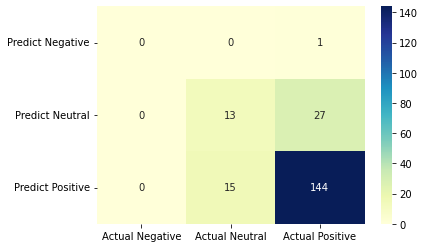

In [29]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### naive bayes classifier

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))

Training Accuracy score: 0.8675
Testing Accuracy score: 0.605


In [31]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00         1
     neutral       0.22      0.33      0.26        40
    negative       0.81      0.68      0.74       159

    accuracy                           0.60       200
   macro avg       0.34      0.33      0.33       200
weighted avg       0.69      0.60      0.64       200



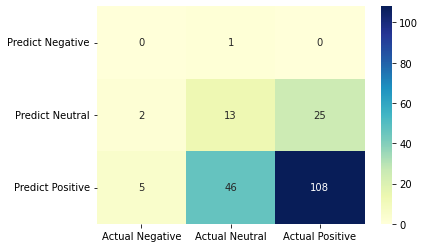

In [32]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


### logistic regression


In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=SEED).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,lr.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,lr.predict(X_test)),4)))

Training Accuracy score: 0.845
Testing Accuracy score: 0.79


In [34]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00        40
    negative       0.79      0.99      0.88       159

    accuracy                           0.79       200
   macro avg       0.26      0.33      0.29       200
weighted avg       0.63      0.79      0.70       200



/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



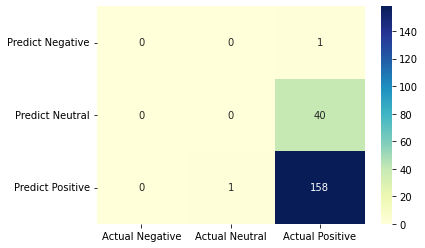

In [35]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### random forest classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 0.9962
Testing Accuracy score: 0.81


In [37]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00         1
     neutral       0.80      0.10      0.18        40
    negative       0.81      0.99      0.89       159

    accuracy                           0.81       200
   macro avg       0.54      0.36      0.36       200
weighted avg       0.80      0.81      0.75       200



/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/enton/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



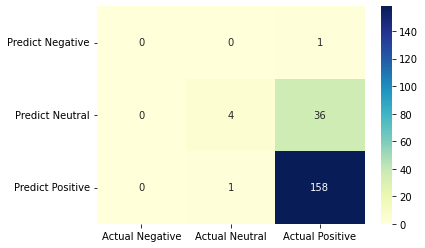

In [38]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [39]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.9962
Testing Accuracy score: 0.79


In [40]:
predictions = pd.Series(vc.predict(X), name="sentiment")
results = pd.concat([predictions],axis=1)
results.to_csv("airbnb-review-sentiment.csv",index=False)